# Usage: policy measures
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.14.0-theta-fu1'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See'],
 3: ['Timor-Leste', 'Laos', 'Saint Kitts and Nevis'],
 4: ['Fiji', 'Tanzania', 'Grenada', 'Dominica'],
 6: ['Brunei', 'Equatorial Guinea'],
 7: ['Saint Vincent and the Grenadines', 'Northern Mariana Islands',
     'Cambodia'],
 8: ['Bahamas', 'Kyrgyzstan', 'Saint Lucia', 'Mauritius', 'Seychelles'],
 9: ['Bhutan', 'Ethiopia', 'Republic of the Congo', 'Papua New Guinea',
     'Zimbabwe', 'Australia', 'Guyana', 'Botswana', 'Sao Tome and Principe',
     'Uzbekistan', 'Liechtenstein', 'Trinidad and Tobago', 'Vietnam',
     'Antigua and Barbuda', 'Guam', 'Madagascar'],
 10: ['Kenya', 'Bolivia', 'Jamaica', 'Venezuela', 'Oman', 'Iceland', 'Maldives',
      'Nicaragua', 'Monaco', 'Singapore', 'Guatemala', 'Virgin Islands, U.S.',
      'India', 'Bahrain', 'Djibouti', 'Barbados', 'Kazakhstan', 'Philippines',
      'Belize', 'Mozambique', 'Angola', 'Iraq', 'Libya'],
 11: ['Gambia', 'New Zealand', 'Mongolia', 'Burundi', 'Suriname', 'Egypt',
      'Swaziland', 'El Salvador', 'Rwand

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=17)
# The number of countries
len(analyser.countries)

15

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{17: ['United Kingdom', 'Czech Republic', 'Latvia', 'Canada', 'Austria',
      'Slovakia', 'Italy', 'Denmark'],
 18: ['Malaysia', 'Switzerland', 'Netherlands', 'Sweden'],
 19: ['Norway', 'Germany', 'Portugal']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country  Phase                                        
Norway   0th    Past  08Mar2020  21Mar2020     5311916
         1st    Past  22Mar2020  05Apr2020     5311916
         2nd    Past  06Apr2020  01May2020     5311916
         3rd    Past  02May2020  05Aug2020     5311916
         4th    Past  06Aug2020  02Sep2020     5311916
         5th    Past  03Sep2020  20Sep2020     5311916
         6th    Past  21Sep2020  07Oct2020     5311916
         7th    Past  08Oct2020  24Oct2020     5311916
         8th    Past  25Oct2020  01Nov2020     5311916
         9th    Past  02Nov2020  08Nov2020     5311916
         10th   Past  09Nov2020  14Nov2020     5311916
         11th   Past  15Nov2020  22Nov2020     5311916
         12th   Past  23Nov2020  29Nov2020     5311916
         13th   Past  30Nov2020  07Dec2020     5311916
         14th   Past  08Dec2020  14Dec2020     5311916
         15th   Past  15Dec2020  21Dec2020     5311916
         16th   Past  22Dec2020  28Dec2020     5311916
         17th   Past  29Dec2020  04Jan2021     5311916
         18th   Past  05Jan2021  13Jan2021     5311916
Germany  0th    Past  19Jan2020  23Mar2020    82905782
         1st    Past  24Mar2020  06Apr2020    82905782
         2nd    Past  07Apr2020  05May2020    82905782
         3rd    Past  06May2020  04Aug2020    82905782
         4th    Past  05Aug2020  12Sep2020    82905782
         5th    Past  13Sep2020  07Oct2020    82905782
         6th    Past  08Oct2020  20Oct2020    82905782
         7th    Past  21Oct2020  27Oct2020    82905782
         8th    Past  28Oct2020  03Nov2020    82905782
         9th    Past  04Nov2020  10Nov2020    82905782
         10th   Past  11Nov2020  17Nov2020    82905782
         11th   Past  18Nov2020  24Nov2020    82905782
         12th   Past  25Nov2020  01Dec2020    82905782
         13th   Past  02Dec2020  08Dec2020    82905782
         14th   Past  09Dec2020  15Dec2020    82905782
         15th   Past  16Dec2020  21Dec2020    82905782
         16th   Past  22Dec2020  28Dec2020    82905782
         17th   Past  29Dec2020  04Jan2021    82905782
         18th   Past  05Jan2021  13Jan2021    82905782
Portugal 0th    Past  14Mar2020  03Apr2020    10283822
         1st    Past  04Apr2020  23Apr2020    10283822
         2nd    Past  24Apr2020  05Jun2020    10283822
         3rd    Past  06Jun2020  09Jul2020    10283822
         4th    Past  10Jul2020  01Sep2020    10283822
         5th    Past  02Sep2020  24Sep2020    10283822
         6th    Past  25Sep2020  12Oct2020    10283822
         7th    Past  13Oct2020  21Oct2020    10283822
         8th    Past  22Oct2020  28Oct2020    10283822
         9th    Past  29Oct2020  04Nov2020    10283822
         10th   Past  05Nov2020  14Nov2020    10283822
         11th   Past  15Nov2020  25Nov2020    10283822
         12th   Past  26Nov2020  02Dec2020    10283822
         13th   Past  03Dec2020  09Dec2020    10283822
         14th   Past  10Dec2020  15Dec2020    10283822
         15th   Past  16Dec2020  22Dec2020    10283822
         16th   Past  23Dec2020  29Dec2020    10283822
         17th   Past  30Dec2020  05Jan2021    10283822
         18th   Past  06Jan2021  13Jan2021    10283822

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	LVA, 14th phase (20Dec2020 - 29Dec2020): finished  326 trials in 0 min 10 sec

	NOR, 18th phase (05Jan2021 - 13Jan2021): finished  330 trials in 0 min 10 sec

	CZE,  0th phase (12Mar2020 - 06Aug2020): finished  293 trials in 0 min 10 sec

	CZE,  3rd phase (29Sep2020 - 07Oct2020): finished  330 trials in 0 min 10 sec

	MYS, 11th phase (18Nov2020 - 28Nov2020): finished  329 trials in 0 min 10 sec

	MYS,  5th phase (05Oct2020 - 12Oct2020): finished  333 trials in 0 min 10 sec

	AUT, 12th phase (07Dec2020 - 12Dec2020): finished  331 trials in 0 min 10 sec

	CAN,  5th phase (13Sep2020 - 03Oct2020): finished  327 trials in 0 min 10 sec

	CHE,  3rd phase (03Aug2020 - 07Sep2020): finished  323 trials in 0 min 10 sec

	SVK, 11th phase (03Dec2020 - 09Dec2020): finished  335 trials in 0 min 10 sec

	SVK,  0th phase (18Mar2020 - 03Sep2020): finished  293 trials in 0 min 10 sec

	DNK,  9th phase (06Nov2020 - 14Nov2020): finished  333 trials in 0 min 10 sec

	MYS, 16th phase (31Dec2020 - 05Jan2021): finished  331 trials in 0 min 10 sec

	CZE, 13th phase (16Dec2020 - 21Dec2020): finished  334 trials in 0 min 10 sec

	GBR,  0th phase (17Feb2020 - 11Apr2020): finished  314 trials in 0 min 10 sec

	NOR,  1st phase (22Mar2020 - 05Apr2020): finished  330 trials in 0 min 10 sec

	CHE,  5th phase (05Oct2020 - 13Oct2020): finished  309 trials in 0 min 10 sec

	NOR, 17th phase (29Dec2020 - 04Jan2021): finished  309 trials in 0 min 10 sec

	PRT, 10th phase (05Nov2020 - 14Nov2020): finished  308 trials in 0 min 10 sec

	NLD,  8th phase (29Oct2020 - 04Nov2020): finished  322 trials in 0 min 10 sec

	AUT, 11th phase (01Dec2020 - 06Dec2020): finished  334 trials in 0 min 10 sec

	GBR,  2nd phase (06May2020 - 16Jun2020): finished  320 trials in 0 min 10 sec

	CHE,  1st phase (24Mar2020 - 07Apr2020): finished  330 trials in 0 min 10 sec

	NOR, 13th phase (30Nov2020 - 07Dec2020): finished  332 trials in 0 min 10 sec

	SWE,  6th phase (05Oct2020 - 26Oct2020): finished  329 trials in 0 min 10 sec

	NOR, 14th phase (08Dec2020 - 14Dec2020): finished  335 trials in 0 min 10 sec

	PRT,  2nd phase (24Apr2020 - 05Jun2020): finished  320 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 03Apr2020): finished  327 trials in 0 min 10 sec

	NLD,  7th phase (23Oct2020 - 28Oct2020): finished  322 trials in 0 min 10 sec

	NOR,  2nd phase (06Apr2020 - 01May2020): finished  315 trials in 0 min 10 sec

	CZE,  2nd phase (15Sep2020 - 28Sep2020): finished  318 trials in 0 min 10 sec

	NOR,  5th phase (03Sep2020 - 20Sep2020): finished  319 trials in 0 min 10 sec

	SWE,  2nd phase (13May2020 - 07Jun2020): finished  323 trials in 0 min 10 sec

	NOR,  7th phase (08Oct2020 - 24Oct2020): finished  327 trials in 0 min 10 sec

	CZE,  7th phase (27Oct2020 - 02Nov2020): finished  329 trials in 0 min 10 sec

	DEU,  2nd phase (07Apr2020 - 05May2020): finished  321 trials in 0 min 10 sec

	NLD, 12th phase (04Dec2020 - 10Dec2020): finished  328 trials in 0 min 10 sec

	NLD,  0th phase (16Mar2020 - 15Apr2020): finished  320 trials in 0 min 10 sec

	MYS,  4th phase (11Sep2020 - 04Oct2020): finished  321 trials in 0 min 10 sec

	GBR,  9th phase (05Nov2020 - 11Nov2020): finished  328 trials in 0 min 10 sec

	NLD,  9th phase (05Nov2020 - 13Nov2020): finished  325 trials in 0 min 10 sec

	NLD, 10th phase (14Nov2020 - 23Nov2020): finished  328 trials in 0 min 10 sec

	AUT,  8th phase (31Oct2020 - 09Nov2020): finished  326 trials in 0 min 10 sec

	MYS,  6th phase (13Oct2020 - 18Oct2020): finished  330 trials in 0 min 10 sec

	ITA,  0th phase (24Feb2020 - 21Mar2020): finished  323 trials in 0 min 10 sec

	PRT,  3rd phase (06Jun2020 - 09Jul2020): finished  321 trials in 0 min 10 sec

	CHE,  8th phase (30Oct2020 - 08Nov2020): finished  327 trials in 0 min 10 sec

	CAN,  3rd phase (26May2020 - 22Jul2020): finished  314 trials in 0 min 10 sec

	CAN,  8th phase (31Oct2020 - 10Nov2020): finished  326 trials in 0 min 10 sec

	CAN,  9th phase (11Nov2020 - 19Nov2020): finished  329 trials in 0 min 10 sec

	MYS, 10th phase (12Nov2020 - 17Nov2020): finished  327 trials in 0 min 10 sec

	SVK, 10th phase (26Nov2020 - 02Dec2020): finished  327 trials in 0 min 10 sec

	CAN, 13th phase (13Dec2020 - 20Dec2020): finished  324 trials in 0 min 10 sec

	NLD, 11th phase (24Nov2020 - 03Dec2020): finished  325 trials in 0 min 10 sec

	GBR, 11th phase (20Nov2020 - 29Nov2020): finished  325 trials in 0 min 10 sec

	ITA,  4th phase (27Aug2020 - 29Sep2020): finished  315 trials in 0 min 10 sec

	NOR, 10th phase (09Nov2020 - 14Nov2020): finished  332 trials in 0 min 10 sec

	ITA,  1st phase (22Mar2020 - 07Apr2020): finished  329 trials in 0 min 10 sec

	AUT, 10th phase (20Nov2020 - 30Nov2020): finished  330 trials in 0 min 10 sec

	CZE, 12th phase (08Dec2020 - 15Dec2020): finished  329 trials in 0 min 10 sec

	LVA, 13th phase (10Dec2020 - 19Dec2020): finished  283 trials in 0 min 10 sec

	GBR,  5th phase (03Oct2020 - 12Oct2020): finished  284 trials in 0 min 10 sec

	NOR,  6th phase (21Sep2020 - 07Oct2020): finished  286 trials in 0 min 10 sec

	CZE,  4th phase (08Oct2020 - 14Oct2020): finished  282 trials in 0 min 10 sec

	SVK,  2nd phase (29Sep2020 - 08Oct2020): finished  319 trials in 0 min 10 sec

	MYS,  3rd phase (25May2020 - 10Sep2020): finished  291 trials in 0 min 10 sec

	MYS, 12th phase (29Nov2020 - 04Dec2020): finished  321 trials in 0 min 10 sec

	NOR,  8th phase (25Oct2020 - 01Nov2020): finished  319 trials in 0 min 10 sec

	CHE, 15th phase (21Dec2020 - 27Dec2020): finished  225 trials in 0 min 10 sec

	LVA,  8th phase (29Oct2020 - 03Nov2020): finished  219 trials in 0 min 10 sec

	DNK,  6th phase (08Oct2020 - 21Oct2020): finished  218 trials in 0 min 10 sec

	CHE, 11th phase (25Nov2020 - 30Nov2020): finished  217 trials in 0 min 10 sec

	NLD, 15th phase (23Dec2020 - 29Dec2020): finished  222 trials in 0 min 10 sec

	CZE,  9th phase (10Nov2020 - 17Nov2020): finished  234 trials in 0 min 10 sec

	DEU, 13th phase (02Dec2020 - 08Dec2020): finished  224 trials in 0 min 10 sec

	ITA,  6th phase (15Oct2020 - 22Oct2020): finished  221 trials in 0 min 10 sec

	DNK,  4th phase (11Sep2020 - 23Sep2020): finished  196 trials in 0 min 10 sec

	PRT,  6th phase (25Sep2020 - 12Oct2020): finished  189 trials in 0 min 10 sec

	MYS, 17th phase (06Jan2021 - 13Jan2021): finished  193 trials in 0 min 10 sec

	DEU,  3rd phase (06May2020 - 04Aug2020): finished  170 trials in 0 min 10 sec

	CHE, 17th phase (04Jan2021 - 13Jan2021): finished  248 trials in 0 min 10 sec

	DNK,  8th phase (30Oct2020 - 05Nov2020): finished  250 trials in 0 min 10 sec

	DEU,  0th phase (19Jan2020 - 23Mar2020): finished  242 trials in 0 min 10 sec

	GBR,  1st phase (12Apr2020 - 05May2020): finished  258 trials in 0 min 10 sec

	MYS,  7th phase (19Oct2020 - 24Oct2020): finished  215 trials in 0 min 10 sec

	NOR, 15th phase (15Dec2020 - 21Dec2020): finished  241 trials in 0 min 10 sec

	PRT,  1st phase (04Apr2020 - 23Apr2020): finished  226 trials in 0 min 10 sec

	NLD,  5th phase (10Oct2020 - 16Oct2020): finished  230 trials in 0 min 10 sec

	SWE,  7th phase (27Oct2020 - 03Nov2020): finished  233 trials in 0 min 10 sec

	CZE, 11th phase (29Nov2020 - 07Dec2020): finished  233 trials in 0 min 10 sec

	NLD,  1st phase (16Apr2020 - 09Aug2020): finished  206 trials in 0 min 10 sec

	DNK,  3rd phase (08Aug2020 - 10Sep2020): finished  215 trials in 0 min 10 sec

	CHE,  7th phase (20Oct2020 - 29Oct2020): finished  207 trials in 0 min 10 sec

	CHE, 10th phase (15Nov2020 - 24Nov2020): finished  216 trials in 0 min 10 sec

	GBR,  3rd phase (17Jun2020 - 09Sep2020): finished  199 trials in 0 min 10 sec

	NLD,  4th phase (01Oct2020 - 09Oct2020): finished  208 trials in 0 min 10 sec

	LVA,  6th phase (16Oct2020 - 22Oct2020): finished  201 trials in 0 min 10 sec

	CAN,  4th phase (23Jul2020 - 12Sep2020): finished  203 trials in 0 min 10 sec

	DNK, 12th phase (30Nov2020 - 05Dec2020): finished  221 trials in 0 min 10 sec

	CHE, 12th phase (01Dec2020 - 07Dec2020): finished  203 trials in 0 min 10 sec

	CZE,  1st phase (07Aug2020 - 14Sep2020): finished  199 trials in 0 min 10 sec

	DEU,  6th phase (08Oct2020 - 20Oct2020): finished  207 trials in 0 min 10 sec

	CAN,  2nd phase (01May2020 - 25May2020): finished  199 trials in 0 min 10 sec

	GBR,  6th phase (13Oct2020 - 20Oct2020): finished  220 trials in 0 min 10 sec

	PRT,  7th phase (13Oct2020 - 21Oct2020): finished  204 trials in 0 min 10 sec

	CHE,  6th phase (14Oct2020 - 19Oct2020): finished  208 trials in 0 min 10 sec

	LVA, 10th phase (10Nov2020 - 19Nov2020): finished  207 trials in 0 min 10 sec

	AUT,  5th phase (01Oct2020 - 12Oct2020): finished  202 trials in 0 min 10 sec

	DNK,  0th phase (06Mar2020 - 05Apr2020): finished  197 trials in 0 min 10 sec

	DEU, 14th phase (09Dec2020 - 15Dec2020): finished  216 trials in 0 min 10 sec

	PRT,  5th phase (02Sep2020 - 24Sep2020): finished  194 trials in 0 min 10 sec

	GBR,  7th phase (21Oct2020 - 27Oct2020): finished  205 trials in 0 min 10 sec

	ITA,  3rd phase (01May2020 - 26Aug2020): finished  175 trials in 0 min 10 sec

	NLD, 16th phase (30Dec2020 - 05Jan2021): finished  217 trials in 0 min 10 sec

	CAN, 10th phase (20Nov2020 - 27Nov2020): finished  199 trials in 0 min 10 sec

	MYS,  1st phase (25Mar2020 - 11Apr2020): finished  202 trials in 0 min 10 sec

	CAN,  0th phase (11Mar2020 - 09Apr2020): finished  209 trials in 0 min 10 sec

	DNK,  7th phase (22Oct2020 - 29Oct2020): finished  214 trials in 0 min 10 sec

	GBR,  4th phase (10Sep2020 - 02Oct2020): finished  211 trials in 0 min 10 sec

	LVA,  5th phase (08Oct2020 - 15Oct2020): finished  205 trials in 0 min 10 sec

	GBR, 10th phase (12Nov2020 - 19Nov2020): finished  205 trials in 0 min 10 sec

	NLD,  3rd phase (17Sep2020 - 30Sep2020): finished  207 trials in 0 min 10 sec

	CAN, 14th phase (21Dec2020 - 28Dec2020): finished  206 trials in 0 min 10 sec

	DNK,  2nd phase (06May2020 - 07Aug2020): finished  185 trials in 0 min 10 sec

	CZE,  8th phase (03Nov2020 - 09Nov2020): finished  228 trials in 0 min 10 sec

	AUT,  7th phase (21Oct2020 - 30Oct2020): finished  222 trials in 0 min 10 sec

	AUT,  0th phase (05Mar2020 - 28Mar2020): finished  220 trials in 0 min 10 sec

	NOR, 11th phase (15Nov2020 - 22Nov2020): finished  222 trials in 0 min 10 sec

	SVK,  9th phase (19Nov2020 - 25Nov2020): finished  221 trials in 0 min 10 sec

	CZE,  6th phase (21Oct2020 - 26Oct2020): finished  219 trials in 0 min 10 sec

	AUT,  2nd phase (13Jul2020 - 24Aug2020): finished  194 trials in 0 min 10 sec

	NLD,  6th phase (17Oct2020 - 22Oct2020): finished  215 trials in 0 min 10 sec

	DEU,  4th phase (05Aug2020 - 12Sep2020): finished  197 trials in 0 min 10 sec

	DNK, 15th phase (26Dec2020 - 04Jan2021): finished  210 trials in 0 min 10 sec

	AUT,  3rd phase (25Aug2020 - 14Sep2020): finished  204 trials in 0 min 10 sec

	ITA,  8th phase (02Nov2020 - 11Nov2020): finished  209 trials in 0 min 10 sec

	DNK, 14th phase (16Dec2020 - 25Dec2020): finished  206 trials in 0 min 10 sec

	CAN, 11th phase (28Nov2020 - 04Dec2020): finished  205 trials in 0 min 10 sec

	CHE,  2nd phase (08Apr2020 - 02Aug2020): finished  180 trials in 0 min 10 sec

	MYS, 15th phase (25Dec2020 - 30Dec2020): finished  211 trials in 0 min 10 sec

	NLD, 13th phase (11Dec2020 - 16Dec2020): finished  248 trials in 0 min 10 sec

	DEU,  9th phase (04Nov2020 - 10Nov2020): finished  260 trials in 0 min 10 sec

	SVK,  1st phase (04Sep2020 - 28Sep2020): finished  247 trials in 0 min 10 sec

	NOR,  0th phase (08Mar2020 - 21Mar2020): finished  264 trials in 0 min 10 sec

	CAN,  7th phase (18Oct2020 - 30Oct2020): finished  204 trials in 0 min 10 sec

	CHE,  4th phase (08Sep2020 - 04Oct2020): finished  198 trials in 0 min 10 sec

	DEU,  5th phase (13Sep2020 - 07Oct2020): finished  195 trials in 0 min 10 sec

	LVA,  9th phase (04Nov2020 - 09Nov2020): finished  209 trials in 0 min 10 sec

	DNK,  1st phase (06Apr2020 - 05May2020): finished  168 trials in 0 min 10 sec

	CHE,  0th phase (03Mar2020 - 23Mar2020): finished  173 trials in 0 min 10 sec

	DNK, 13th phase (06Dec2020 - 15Dec2020): finished  181 trials in 0 min 10 sec

	PRT, 15th phase (16Dec2020 - 22Dec2020): finished  176 trials in 0 min 10 sec

	ITA,  9th phase (12Nov2020 - 21Nov2020): finished  213 trials in 0 min 10 sec

	CHE, 13th phase (08Dec2020 - 13Dec2020): finished  216 trials in 0 min 10 sec

	GBR, 13th phase (10Dec2020 - 16Dec2020): finished  223 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 06Apr2020): finished  235 trials in 0 min 10 sec

	CZE,  5th phase (15Oct2020 - 20Oct2020): finished  253 trials in 0 min 10 sec

	NOR, 16th phase (22Dec2020 - 28Dec2020): finished  247 trials in 0 min 10 sec

	PRT,  4th phase (10Jul2020 - 01Sep2020): finished  219 trials in 0 min 10 sec

	SWE,  3rd phase (08Jun2020 - 24Jun2020): finished  239 trials in 0 min 10 sec

	DEU, 11th phase (18Nov2020 - 24Nov2020): finished  269 trials in 0 min 10 sec

	LVA,  0th phase (10Mar2020 - 01Apr2020): finished  223 trials in 0 min 10 sec

	NLD,  2nd phase (10Aug2020 - 16Sep2020): finished  229 trials in 0 min 10 sec

	ITA, 10th phase (22Nov2020 - 02Dec2020): finished  254 trials in 0 min 10 sec

	CAN, 12th phase (05Dec2020 - 12Dec2020): finished  245 trials in 0 min 10 sec

	SWE,  4th phase (25Jun2020 - 12Aug2020): finished  235 trials in 0 min 10 sec

	SVK,  8th phase (11Nov2020 - 18Nov2020): finished  260 trials in 0 min 10 sec

	NOR, 12th phase (23Nov2020 - 29Nov2020): finished  266 trials in 0 min 10 sec

	ITA,  5th phase (30Sep2020 - 14Oct2020): finished  238 trials in 0 min 10 sec

	SVK,  3rd phase (09Oct2020 - 15Oct2020): finished  225 trials in 0 min 10 sec

	PRT,  8th phase (22Oct2020 - 28Oct2020): finished  247 trials in 0 min 10 sec

	MYS,  8th phase (25Oct2020 - 30Oct2020): finished  245 trials in 0 min 10 sec

	LVA,  3rd phase (07Aug2020 - 28Sep2020): finished  210 trials in 0 min 10 sec

	CHE, 16th phase (28Dec2020 - 03Jan2021): finished  218 trials in 0 min 10 sec

	LVA, 15th phase (30Dec2020 - 04Jan2021): finished  192 trials in 0 min 10 sec

	DNK,  5th phase (24Sep2020 - 07Oct2020): finished  201 trials in 0 min 10 sec

	LVA,  1st phase (02Apr2020 - 05May2020): finished  299 trials in 0 min 10 sec

	MYS,  0th phase (07Feb2020 - 24Mar2020): finished  306 trials in 0 min 10 sec

	ITA,  2nd phase (08Apr2020 - 30Apr2020): finished  314 trials in 0 min 10 sec

	SWE,  0th phase (21Feb2020 - 15Apr2020): finished  313 trials in 0 min 10 sec

	MYS, 13th phase (05Dec2020 - 14Dec2020): finished  326 trials in 0 min 10 sec

	DEU,  8th phase (28Oct2020 - 03Nov2020): finished  326 trials in 0 min 10 sec

	GBR, 12th phase (30Nov2020 - 09Dec2020): finished  325 trials in 0 min 10 sec

	SWE,  1st phase (16Apr2020 - 12May2020): finished  317 trials in 0 min 10 sec

	PRT, 11th phase (15Nov2020 - 25Nov2020): finished  327 trials in 0 min 10 sec

	AUT,  1st phase (29Mar2020 - 12Jul2020): finished  296 trials in 0 min 10 sec

	CAN,  1st phase (10Apr2020 - 30Apr2020): finished  323 trials in 0 min 10 sec

	NOR,  4th phase (06Aug2020 - 02Sep2020): finished  318 trials in 0 min 10 sec

	GBR,  8th phase (28Oct2020 - 04Nov2020): finished  331 trials in 0 min 10 sec

	NOR,  3rd phase (02May2020 - 05Aug2020): finished  299 trials in 0 min 10 sec

	MYS,  2nd phase (12Apr2020 - 24May2020): finished  316 trials in 0 min 10 sec

	DEU, 12th phase (25Nov2020 - 01Dec2020): finished  327 trials in 0 min 10 sec

	NOR,  9th phase (02Nov2020 - 08Nov2020): finished  310 trials in 0 min 10 sec

	LVA,  2nd phase (06May2020 - 06Aug2020): finished  277 trials in 0 min 10 sec

	GBR, 14th phase (17Dec2020 - 22Dec2020): finished  310 trials in 0 min 10 sec

	CAN,  6th phase (04Oct2020 - 17Oct2020): finished  301 trials in 0 min 10 sec

	DEU, 10th phase (11Nov2020 - 17Nov2020): finished  327 trials in 0 min 10 sec

	GBR, 16th phase (29Dec2020 - 13Jan2021): finished  326 trials in 0 min 10 sec

	SWE,  5th phase (13Aug2020 - 04Oct2020): finished  315 trials in 0 min 10 sec

	MYS,  9th phase (31Oct2020 - 11Nov2020): finished  324 trials in 0 min 10 sec

	ITA,  7th phase (23Oct2020 - 01Nov2020): finished  344 trials in 0 min 10 sec

	CHE, 14th phase (14Dec2020 - 20Dec2020): finished  349 trials in 0 min 10 sec

	AUT,  4th phase (15Sep2020 - 30Sep2020): finished  342 trials in 0 min 10 sec

	MYS, 14th phase (15Dec2020 - 24Dec2020): finished  345 trials in 0 min 10 sec

	GBR, 15th phase (23Dec2020 - 28Dec2020): finished  348 trials in 0 min 10 sec

	PRT, 14th phase (10Dec2020 - 15Dec2020): finished  344 trials in 0 min 10 sec

Completed optimization. Total: 9 min 22 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt  \
Country  Phase                                                         
Norway   0th    Past  08Mar2020  21Mar2020     5311916  SIR-F  84.51   
         1st    Past  22Mar2020  05Apr2020     5311916  SIR-F  35.09   
         2nd    Past  06Apr2020  01May2020     5311916  SIR-F   0.30   
         3rd    Past  02May2020  05Aug2020     5311916  SIR-F   0.34   
         4th    Past  06Aug2020  02Sep2020     5311916  SIR-F   2.03   
         5th    Past  03Sep2020  20Sep2020     5311916  SIR-F   1.80   
         6th    Past  21Sep2020  07Oct2020     5311916  SIR-F   2.25   
         7th    Past  08Oct2020  24Oct2020     5311916  SIR-F   0.92   
         8th    Past  25Oct2020  01Nov2020     5311916  SIR-F   2.86   
         9th    Past  02Nov2020  08Nov2020     5311916  SIR-F   4.26   
         10th   Past  09Nov2020  14Nov2020     5311916  SIR-F   4.19   
         11th   Past  15Nov2020  22Nov2020     5311916  SIR-F   5.82   
         12th   Past  23Nov2020  29Nov2020     5311916  SIR-F   4.15   
         13th   Past  30Nov2020  07Dec2020     5311916  SIR-F   3.19   
         14th   Past  08Dec2020  14Dec2020     5311916  SIR-F   2.84   
         15th   Past  15Dec2020  21Dec2020     5311916  SIR-F   2.75   
         16th   Past  22Dec2020  28Dec2020     5311916  SIR-F   2.99   
         17th   Past  29Dec2020  04Jan2021     5311916  SIR-F   3.26   
         18th   Past  05Jan2021  13Jan2021     5311916  SIR-F   2.76   
Germany  0th    Past  19Jan2020  23Mar2020    82905782  SIR-F   3.37   
         1st    Past  24Mar2020  06Apr2020    82905782  SIR-F   4.25   
         2nd    Past  07Apr2020  05May2020    82905782  SIR-F   0.51   
         3rd    Past  06May2020  04Aug2020    82905782  SIR-F   0.75   
         4th    Past  05Aug2020  12Sep2020    82905782  SIR-F   1.42   
         5th    Past  13Sep2020  07Oct2020    82905782  SIR-F   1.45   
         6th    Past  08Oct2020  20Oct2020    82905782  SIR-F   3.06   
         7th    Past  21Oct2020  27Oct2020    82905782      -      -   
         8th    Past  28Oct2020  03Nov2020    82905782  SIR-F   2.32   
         9th    Past  04Nov2020  10Nov2020    82905782  SIR-F   1.46   
         10th   Past  11Nov2020  17Nov2020    82905782  SIR-F   1.05   
         11th   Past  18Nov2020  24Nov2020    82905782  SIR-F   0.97   
         12th   Past  25Nov2020  01Dec2020    82905782  SIR-F   0.84   
         13th   Past  02Dec2020  08Dec2020    82905782  SIR-F   0.99   
         14th   Past  09Dec2020  15Dec2020    82905782  SIR-F   1.24   
         15th   Past  16Dec2020  21Dec2020    82905782      -      -   
         16th   Past  22Dec2020  28Dec2020    82905782      -      -   
         17th   Past  29Dec2020  04Jan2021    82905782      -      -   
         18th   Past  05Jan2021  13Jan2021    82905782      -      -   
Portugal 0th    Past  14Mar2020  03Apr2020    10283822  SIR-F  30.50   
         1st    Past  04Apr2020  23Apr2020    10283822  SIR-F  10.75   
         2nd    Past  24Apr2020  05Jun2020    10283822  SIR-F   1.35   
         3rd    Past  06Jun2020  09Jul2020    10283822  SIR-F   1.30   
         4th    Past  10Jul2020  01Sep2020    10283822  SIR-F   0.80   
         5th    Past  02Sep2020  24Sep2020    10283822  SIR-F   2.61   
         6th    Past  25Sep2020  12Oct2020    10283822  SIR-F   2.30   
         7th    Past  13Oct2020  21Oct2020    10283822  SIR-F   2.16   
         8th    Past  22Oct2020  28Oct2020    10283822  SIR-F   1.89   
         9th    Past  29Oct2020  04Nov2020    10283822      -      -   
         10th   Past  05Nov2020  14Nov2020    10283822  SIR-F   1.69   
         11th   Past  15Nov2020  25Nov2020    10283822  SIR-F   0.95   
         12th   Past  26Nov2020  02Dec2020    10283822      -      -   
         13th   Past  03Dec2020  09Dec2020    10283822      -      -   
         14th   Past  10Dec2020  15Dec2020    10283822  SIR-F   0.95   
         15th   Past  16Dec2020  22Dec2020    10283822  

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-02-17,United Kingdom,0.03515,0.000005,0.050289,0.001579,0.035,54707,4,158,...,0,0,0,0,0,0,2,1,2,11.11
1,2020-02-17,United Kingdom,0.03515,0.000005,0.050289,0.001579,0.035,54707,4,158,...,0,0,0,0,0,0,2,1,2,11.11
2,2020-02-17,United Kingdom,0.03515,0.000005,0.050289,0.001579,0.035,54707,4,158,...,0,0,0,0,0,0,0,0,0,0.00
3,2020-02-17,United Kingdom,0.03515,0.000005,0.050289,0.001579,0.035,54707,4,158,...,0,0,0,0,0,0,0,0,0,0.00
4,2020-02-17,United Kingdom,0.03515,0.000005,0.050289,0.001579,0.035,54707,4,158,...,0,0,0,0,0,0,2,1,2,11.11


### $Rt$: Reprodcution number $\mathrm{[-]}$

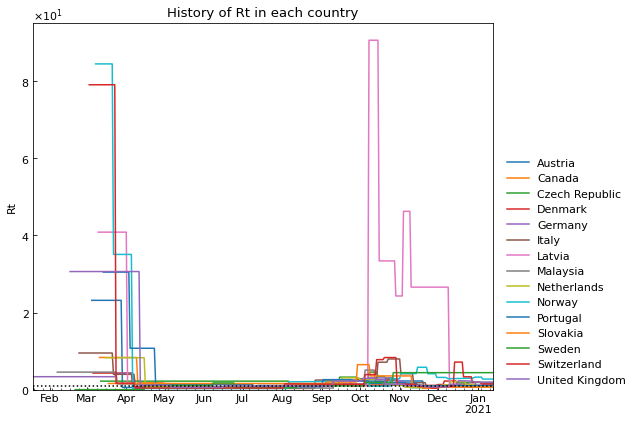

Country,Austria,Canada,Czech Republic,Denmark,Germany,Italy,Latvia,Malaysia,Netherlands,Norway,Portugal,Slovakia,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,,
2021-01-09,0.71,0.87,1.87,0.67,1.24,0.78,0.88,1.55,0.7,2.76,1.08,0.69,4.42,1.5,1.95
2021-01-10,0.71,0.87,1.87,0.67,1.24,0.78,0.88,1.55,0.7,2.76,1.08,0.69,4.42,1.5,1.95
2021-01-11,0.71,0.87,1.87,0.67,1.24,0.78,0.88,1.55,0.7,2.76,1.08,0.69,4.42,1.5,1.95
2021-01-12,0.71,0.87,1.87,0.67,1.24,0.78,0.88,1.55,0.7,2.76,1.08,0.69,4.42,1.5,1.95
2021-01-13,0.71,0.87,1.87,0.67,1.24,0.78,0.88,1.55,0.7,2.76,1.08,0.69,4.42,1.5,1.95


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

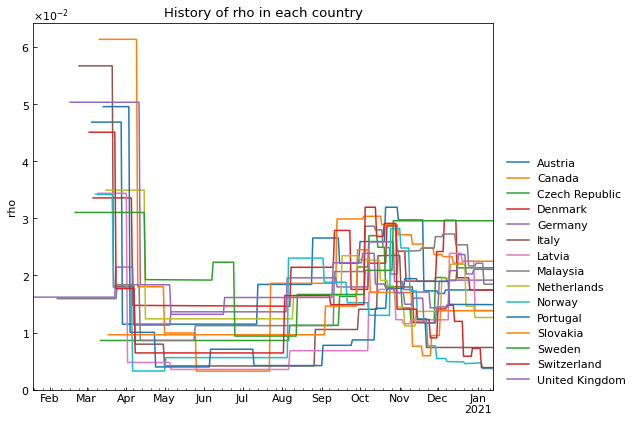

Country,Austria,Canada,Czech Republic,Denmark,Germany,Italy,Latvia,Malaysia,Netherlands,Norway,Portugal,Slovakia,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,,
2021-01-09,0.017453,0.022474,0.021314,0.017438,0.019171,0.007387,0.013847,0.018454,0.012633,0.003694,0.014882,0.013815,0.029556,0.003869,0.021053
2021-01-10,0.017453,0.022474,0.021314,0.017438,0.019171,0.007387,0.013847,0.018454,0.012633,0.003694,0.014882,0.013815,0.029556,0.003869,0.021053
2021-01-11,0.017453,0.022474,0.021314,0.017438,0.019171,0.007387,0.013847,0.018454,0.012633,0.003694,0.014882,0.013815,0.029556,0.003869,0.021053
2021-01-12,0.017453,0.022474,0.021314,0.017438,0.019171,0.007387,0.013847,0.018454,0.012633,0.003694,0.014882,0.013815,0.029556,0.003869,0.021053
2021-01-13,0.017453,0.022474,0.021314,0.017438,0.019171,0.007387,0.013847,0.018454,0.012633,0.003694,0.014882,0.013815,0.029556,0.003869,0.021053


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

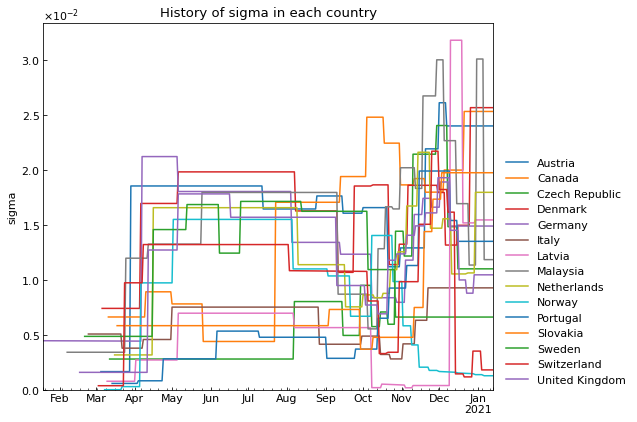

Country,Austria,Canada,Czech Republic,Denmark,Germany,Italy,Latvia,Malaysia,Netherlands,Norway,Portugal,Slovakia,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,,
2021-01-09,0.023988,0.025305,0.010992,0.02565,0.014884,0.009261,0.015439,0.011829,0.017949,0.00127,0.013492,0.019733,0.006607,0.001801,0.010447
2021-01-10,0.023988,0.025305,0.010992,0.02565,0.014884,0.009261,0.015439,0.011829,0.017949,0.00127,0.013492,0.019733,0.006607,0.001801,0.010447
2021-01-11,0.023988,0.025305,0.010992,0.02565,0.014884,0.009261,0.015439,0.011829,0.017949,0.00127,0.013492,0.019733,0.006607,0.001801,0.010447
2021-01-12,0.023988,0.025305,0.010992,0.02565,0.014884,0.009261,0.015439,0.011829,0.017949,0.00127,0.013492,0.019733,0.006607,0.001801,0.010447
2021-01-13,0.023988,0.025305,0.010992,0.02565,0.014884,0.009261,0.015439,0.011829,0.017949,0.00127,0.013492,0.019733,0.006607,0.001801,0.010447


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

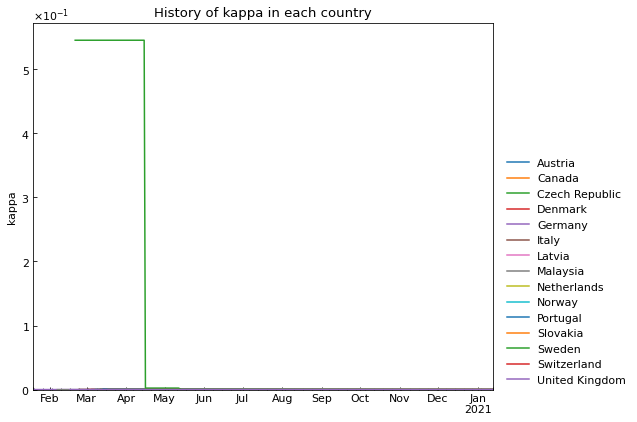

Country,Austria,Canada,Czech Republic,Denmark,Germany,Italy,Latvia,Malaysia,Netherlands,Norway,Portugal,Slovakia,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,,
2021-01-09,0.000516,0.000309,0.000426,0.000014,0.000237,0.000059,0.000014,0.000071,0.000093,0.000059,0.000002,0.000152,0.000068,0.000014,0.000309
2021-01-10,0.000516,0.000309,0.000426,0.000014,0.000237,0.000059,0.000014,0.000071,0.000093,0.000059,0.000002,0.000152,0.000068,0.000014,0.000309
2021-01-11,0.000516,0.000309,0.000426,0.000014,0.000237,0.000059,0.000014,0.000071,0.000093,0.000059,0.000002,0.000152,0.000068,0.000014,0.000309
2021-01-12,0.000516,0.000309,0.000426,0.000014,0.000237,0.000059,0.000014,0.000071,0.000093,0.000059,0.000002,0.000152,0.000068,0.000014,0.000309
2021-01-13,0.000516,0.000309,0.000426,0.000014,0.000237,0.000059,0.000014,0.000071,0.000093,0.000059,0.000002,0.000152,0.000068,0.000014,0.000309


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

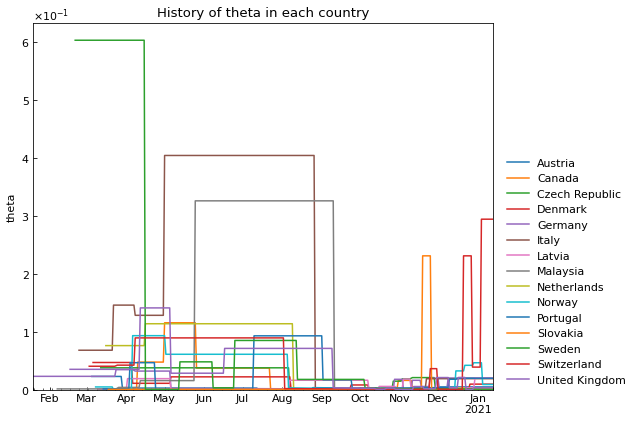

Country,Austria,Canada,Czech Republic,Denmark,Germany,Italy,Latvia,Malaysia,Netherlands,Norway,Portugal,Slovakia,Sweden,Switzerland,United Kingdom
Date,,,,,,,,,,,,,,,
2021-01-09,0.004787,0.003232,0.00057,0.009616,0.020125,0.018999,0.020368,0.000898,0.001806,0.008964,0.019827,0.000066,0.000806,0.294099,0.003232
2021-01-10,0.004787,0.003232,0.00057,0.009616,0.020125,0.018999,0.020368,0.000898,0.001806,0.008964,0.019827,0.000066,0.000806,0.294099,0.003232
2021-01-11,0.004787,0.003232,0.00057,0.009616,0.020125,0.018999,0.020368,0.000898,0.001806,0.008964,0.019827,0.000066,0.000806,0.294099,0.003232
2021-01-12,0.004787,0.003232,0.00057,0.009616,0.020125,0.018999,0.020368,0.000898,0.001806,0.008964,0.019827,0.000066,0.000806,0.294099,0.003232
2021-01-13,0.004787,0.003232,0.00057,0.009616,0.020125,0.018999,0.020368,0.000898,0.001806,0.008964,0.019827,0.000066,0.000806,0.294099,0.003232


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93801 entries, 0 to 93996
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 93801 non-null  datetime64[ns]
 1   Country                              93801 non-null  object        
 2   Rt                                   93801 non-null  float64       
 3   theta                                93801 non-null  float64       
 4   kappa                                93801 non-null  float64       
 5   rho                                  93801 non-null  float64       
 6   sigma                                93801 non-null  float64       
 7   School_closing                       93801 non-null  int64         
 8   Workplace_closing                    93801 non-null  int64         
 9   Cancel_events                        93801 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.124158,-0.051413,0.392324,-0.472338,-0.221289,-0.253337,-0.119965,-0.090601,-0.055476,-0.182134,-0.237610,-0.202719,-0.191701,-0.204656,-0.356686,-0.300026
theta,-0.124158,1.000000,0.661844,-0.018823,-0.044856,0.050587,-0.129731,0.114528,-0.068657,0.127510,-0.073164,0.237741,-0.113664,-0.116792,-0.163455,0.129029,-0.028673
kappa,-0.051413,0.661844,1.000000,0.172115,-0.070548,-0.134498,-0.235034,-0.049192,-0.121889,-0.102823,-0.171915,-0.063107,-0.134493,-0.219348,-0.160590,0.021801,-0.157962
rho,0.392324,-0.018823,0.172115,1.000000,0.025895,-0.390818,-0.268688,-0.055256,-0.007533,-0.315299,-0.142621,0.096340,-0.189124,-0.220618,-0.247226,-0.288952,-0.085272
sigma,-0.472338,-0.044856,-0.070548,0.025895,1.000000,-0.017561,0.178744,0.183554,0.313149,-0.075100,0.167864,0.311836,0.096809,0.154516,0.227946,0.087635,0.263249
School_closing,-0.221289,0.050587,-0.134498,-0.390818,-0.017561,1.000000,0.462928,0.097953,0.086551,0.164023,0.303869,-0.005469,0.286648,0.366587,0.087414,0.159749,0.457750
Workplace_closing,-0.253337,-0.129731,-0.235034,-0.268688,0.178744,0.462928,1.000000,0.316572,0.578294,0.284028,0.537121,0.163366,0.215927,0.409059,0.171242,-0.004883,0.682772
Cancel_events,-0.119965,0.114528,-0.049192,-0.055256,0.183554,0.097953,0.316572,1.000000,0.541521,0.243805,0.340263,0.488692,0.286511,0.376036,-0.130403,-0.068536,0.529903
Gatherings_restrictions,-0.090601,-0.068657,-0.121889,-0.007533,0.313149,0.086551,0.578294,0.541521,1.000000,0.150689,0.422766,0.379092,0.316043,0.373513,-0.060192,-0.221018,0.737184
Transport_closing,-0.055476,0.127510,-0.102823,-0.315299,-0.075100,0.164023,0.284028,0.243805,0.150689,1.000000,0.264563,0.152963,-0.082785,0.217156,0.028240,-0.052905,0.221040


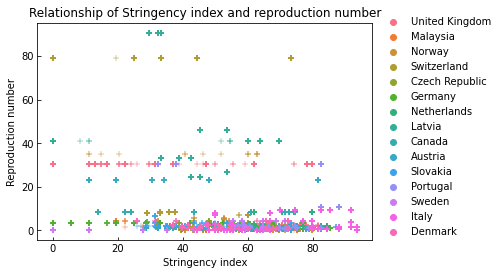

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()